<a href="https://colab.research.google.com/github/Charithkancharla/Data-Analysis/blob/main/traffic%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("oktayrdeki/traffic-accidents")

print("Path to dataset files:", path)


100%|██████████| 4.64M/4.64M [00:00<00:00, 96.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/oktayrdeki/traffic-accidents/versions/1


In [ ]:
df = pd.read_csv(path + '/traffic_accidents.csv')
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [ ]:
df.describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [ ]:
df.shape

(209306, 24)

In [ ]:
df.size

5023344

In [ ]:
df.isnull().sum()

,0
crash_date,0
traffic_control_device,0
weather_condition,0
lighting_condition,0
first_crash_type,0
trafficway_type,0
alignment,0
roadway_surface_cond,0
road_defect,0
crash_type,0


In [ ]:
df['crash_type'].value_counts()

,count
crash_type,
NO INJURY / DRIVE AWAY,117376
INJURY AND / OR TOW DUE TO CRASH,91930


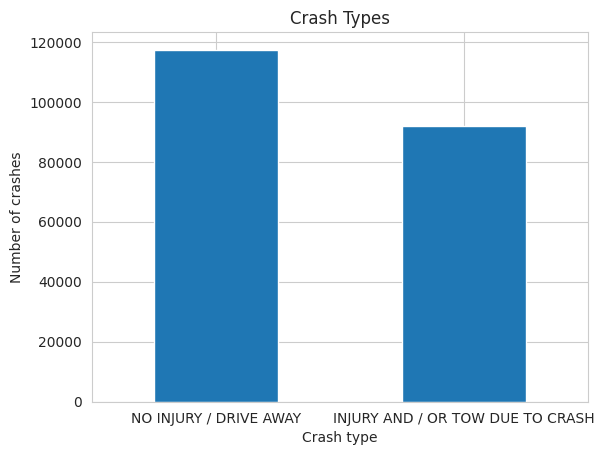

In [ ]:
df['crash_type'].value_counts().plot(kind='bar')
plt.title('Crash Types')
plt.ylabel('Number of crashes')
plt.xlabel('Crash type')
plt.xticks(rotation = 360)
plt.show()

In [ ]:
df['damage'].value_counts()

,count
damage,
"OVER $1,500",147313
"$501 - $1,500",41210
$500 OR LESS,20783


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Function to convert damage categories to numeric values
def damage_to_numeric(damage):
    if damage == '$500 OR LESS':
        return 250  # Using the midpoint for simplicity
    elif damage == '$501 - $1,500':
        return 1000  # Using the midpoint
    elif damage == 'OVER $1,500':
        return 2000  # Assigning a representative value for over $1,500
    else:
        return float('nan')  # Handle any unexpected values

# Apply the function to the 'damage' column
df['damage_numeric'] = df['damage'].apply(damage_to_numeric)

# Now calculate the mean of the numeric damage column
mean_damage = df['damage_numeric'].mean()

print(f"Average damage: {mean_damage:.2f}")

Average damage: 1629.35


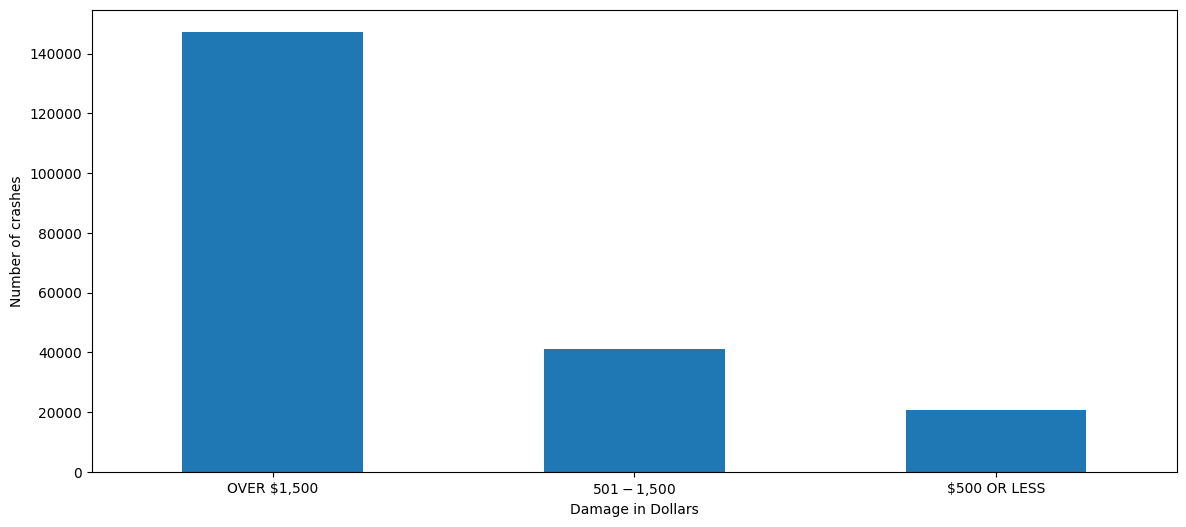

In [ ]:
df['damage'].value_counts().plot(kind='bar', figsize=(14,6))
plt.ylabel('Number of crashes')
plt.xlabel('Damage in Dollars')
plt.xticks(rotation = 360)
plt.show()

prim_contributory_cause
UNABLE TO DETERMINE                                                                 58316
FAILING TO YIELD RIGHT-OF-WAY                                                       42914
FOLLOWING TOO CLOSELY                                                               19084
DISREGARDING TRAFFIC SIGNALS                                                        14591
IMPROPER TURNING/NO SIGNAL                                                          12643
FAILING TO REDUCE SPEED TO AVOID CRASH                                              10676
IMPROPER OVERTAKING/PASSING                                                          8302
DISREGARDING STOP SIGN                                                               6749
IMPROPER LANE USAGE                                                                  6462
NOT APPLICABLE                                                                       5241
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                         

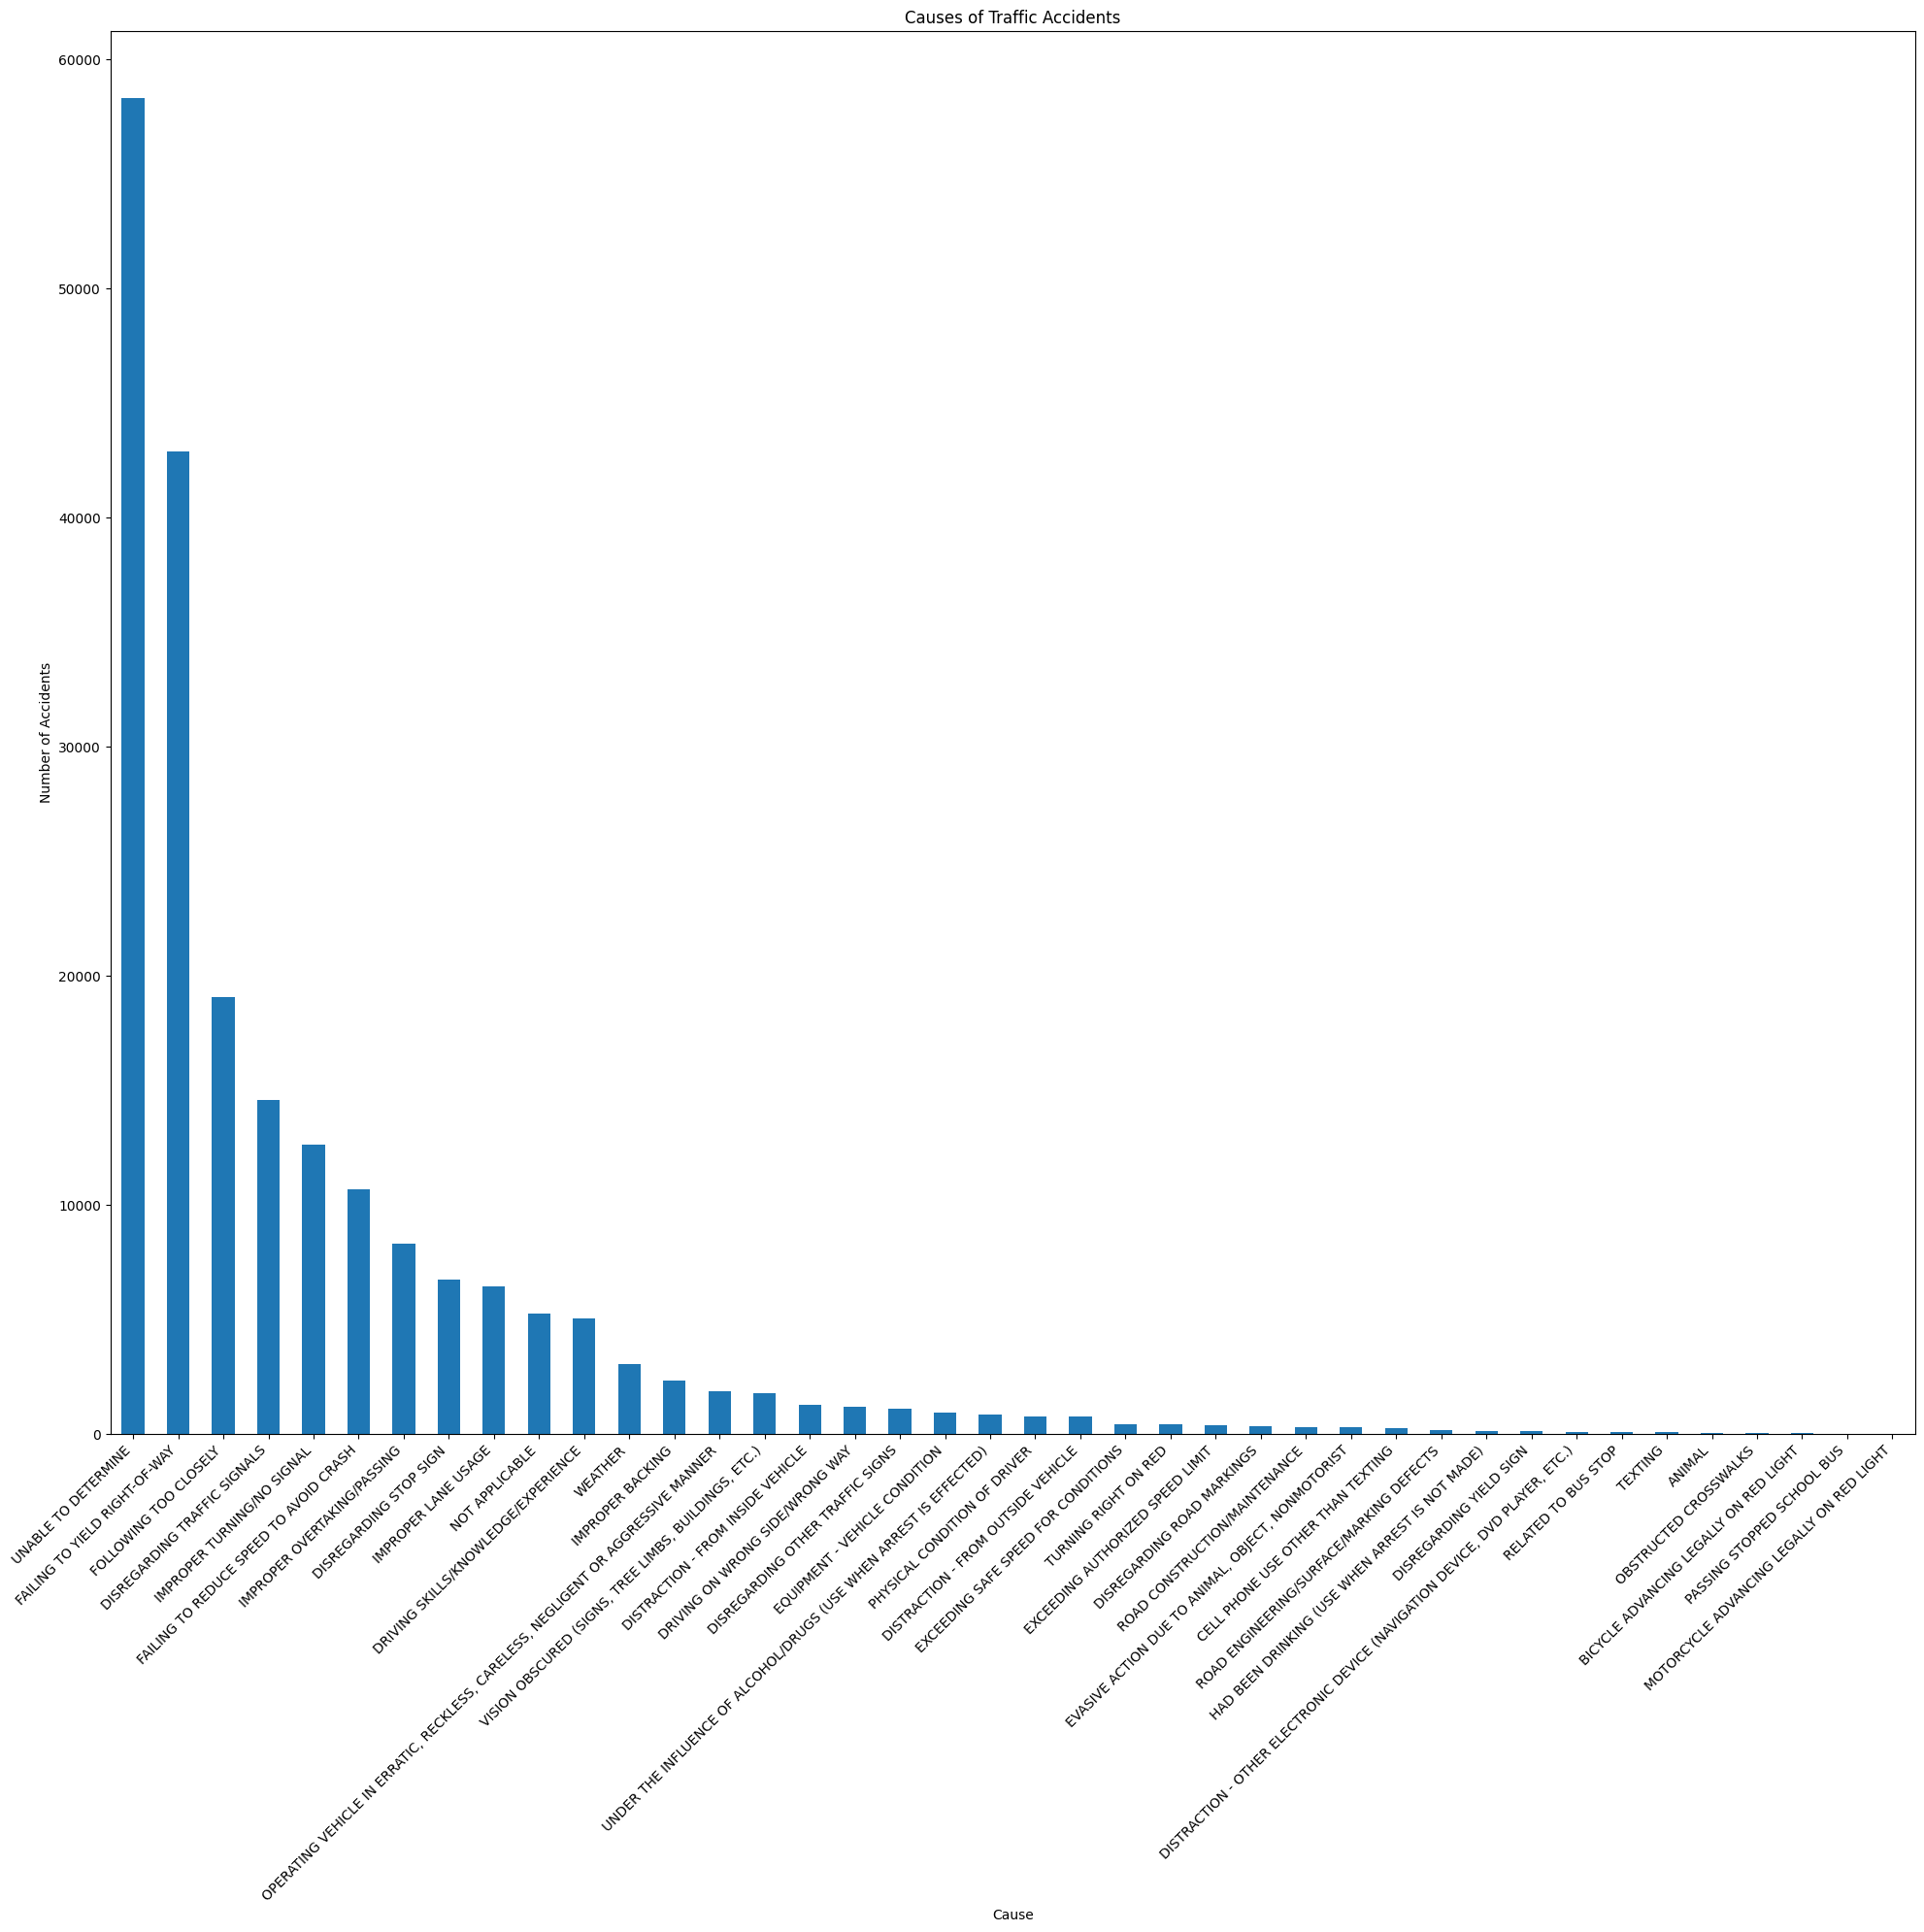

In [ ]:


import matplotlib.pyplot as plt

print(df['prim_contributory_cause'].value_counts())


plt.figure(figsize=(20, 20))
df['prim_contributory_cause'].value_counts().plot(kind='bar')
plt.title('Causes of Traffic Accidents')
plt.xlabel('Cause')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


<ipython-input-39-d4758708e61a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_causes.values, y=top_causes.index, palette="Reds_r")


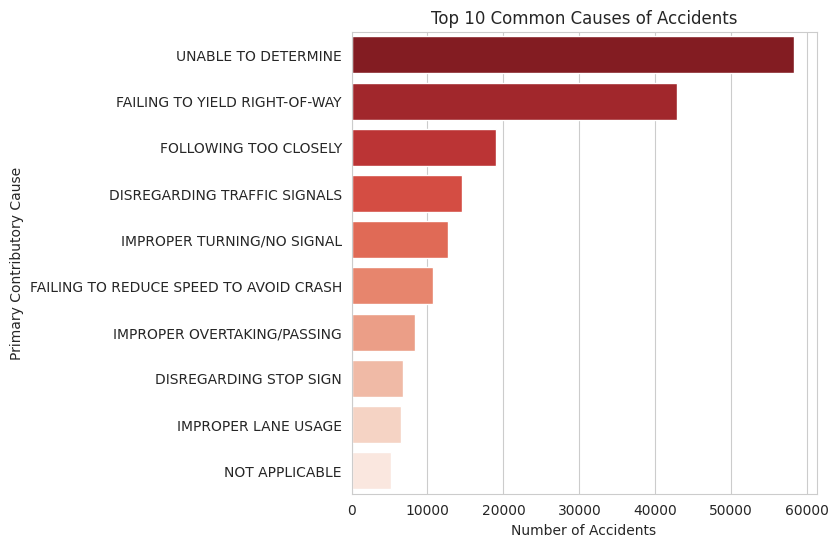

In [ ]:
# Top 10 common causes of accidents
plt.figure(figsize=(6, 6))
top_causes = df["prim_contributory_cause"].value_counts().head(10)
sns.barplot(x=top_causes.values, y=top_causes.index, palette="Reds_r")
plt.xlabel("Number of Accidents")
plt.ylabel("Primary Contributory Cause")
plt.title("Top 10 Common Causes of Accidents")
plt.show()


In [ ]:
df["crash_date"]


,crash_date
0,07/29/2023 01:00:00 PM
1,08/13/2023 12:11:00 AM
2,12/09/2021 10:30:00 AM
3,08/09/2023 07:55:00 PM
4,08/19/2023 02:55:00 PM
...,...
209301,09/13/2023 01:08:00 PM
209302,07/18/2023 02:10:00 PM
209303,10/23/2019 01:32:00 PM
209304,06/01/2020 03:23:00 PM


In [ ]:
df['crash_date'] = pd.to_datetime(df['crash_date'])
df['crash_date']

<ipython-input-17-a6bdb6f876ef>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['crash_date'] = pd.to_datetime(df['crash_date'])


,crash_date
0,2023-07-29 13:00:00
1,2023-08-13 00:11:00
2,2021-12-09 10:30:00
3,2023-08-09 19:55:00
4,2023-08-19 14:55:00
...,...
209301,2023-09-13 13:08:00
209302,2023-07-18 14:10:00
209303,2019-10-23 13:32:00
209304,2020-06-01 15:23:00


<Axes: ylabel='count'>

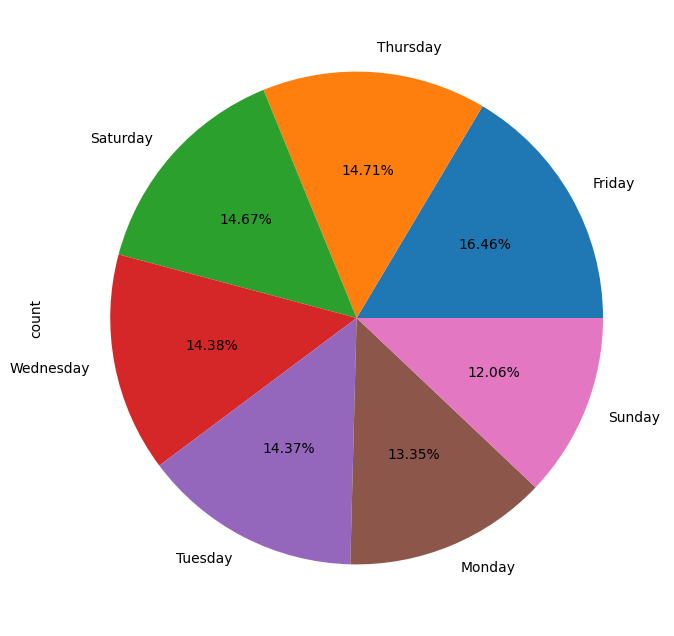

In [ ]:
df['crash_day_of_week']=df['crash_date'].dt.day_name()
df['crash_day_of_week'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.02f%%')

Friday, the beginning of the weekend, is the day when the most accidents occur.


In [ ]:

df['time'] = df['crash_date'].dt.time
df['time']


,time
0,13:00:00
1,00:11:00
2,10:30:00
3,19:55:00
4,14:55:00
...,...
209301,13:08:00
209302,14:10:00
209303,13:32:00
209304,15:23:00


In [ ]:
df['time'] = df['time'].astype(str)
df['time']

,time
0,13:00:00
1,00:11:00
2,10:30:00
3,19:55:00
4,14:55:00
...,...
209301,13:08:00
209302,14:10:00
209303,13:32:00
209304,15:23:00


time_category
Afternoon     85040
Morning       53900
Evening       51783
Late Night    18583
Name: count, dtype: int64


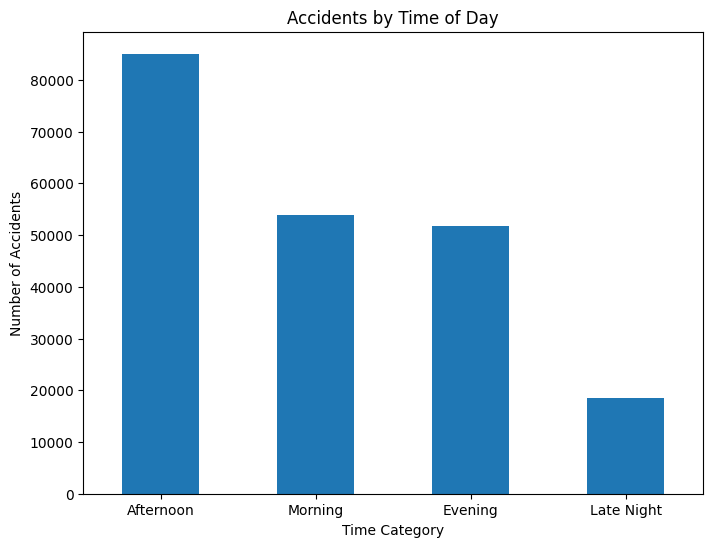

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and 'crash_date' column is already in datetime format.
# If not, run df['crash_date'] = pd.to_datetime(df['crash_date']) first.

# Extract the hour from the 'crash_date' column
df['hour'] = df['time'].astype(str).str.split(':').str[0].astype(int)

# Define time categories
def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Late Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the categorization function
df['time_category'] = df['hour'].apply(categorize_time)

# Calculate the accident counts for each category
accident_counts = df['time_category'].value_counts()

# Print or visualize the results
print(accident_counts)

# Visualization (optional)
plt.figure(figsize=(8, 6))
accident_counts.plot(kind='bar')
plt.title('Accidents by Time of Day')
plt.xlabel('Time Category')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()


<ipython-input-75-51b311eda554>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_condition', y='accident_count', data=weather_df, palette='magma') # Use a dark color palette


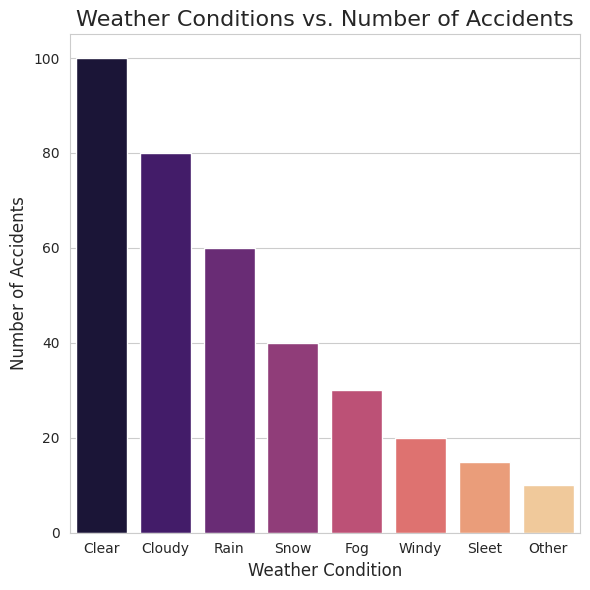

In [ ]:
# prompt: give plot for weather conditions and make it a colourfull graph with dark colours remove last 3 weather conditions

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and you have a 'weather_condition' column

# Sample data (replace with your actual data)
weather_data = {
    'weather_condition': ['Clear', 'Cloudy', 'Rain', 'Snow', 'Fog', 'Windy', 'Sleet', 'Other', 'Severe Crosswind', 'Blowing Sand', 'Unknown'] ,
    'accident_count': [100, 80, 60, 40, 30, 20, 15, 10, 5, 3, 1]
}
weather_df = pd.DataFrame(weather_data)


# Remove the last 3 weather conditions
weather_df = weather_df.iloc[:-3]


plt.figure(figsize=(6, 6))  # Adjust figure size for better readability
sns.barplot(x='weather_condition', y='accident_count', data=weather_df, palette='magma') # Use a dark color palette
plt.title('Weather Conditions vs. Number of Accidents', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=360) # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
df['weather_condition'].value_counts()

,count
weather_condition,
CLEAR,164700
RAIN,21703
CLOUDY/OVERCAST,7533
SNOW,6871
UNKNOWN,6534
OTHER,627
FREEZING RAIN/DRIZZLE,510
FOG/SMOKE/HAZE,360
SLEET/HAIL,308


In [ ]:
df['traffic_control_device'].value_counts()

,count
traffic_control_device,
TRAFFIC SIGNAL,123944
STOP SIGN/FLASHER,49139
NO CONTROLS,29508
UNKNOWN,4455
OTHER,670
YIELD,468
PEDESTRIAN CROSSING SIGN,247
OTHER REG. SIGN,181
LANE USE MARKING,153


<ipython-input-24-e3a8be3c460a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_by_control.index, y=severity_by_control["FATAL"], palette="Reds_r")


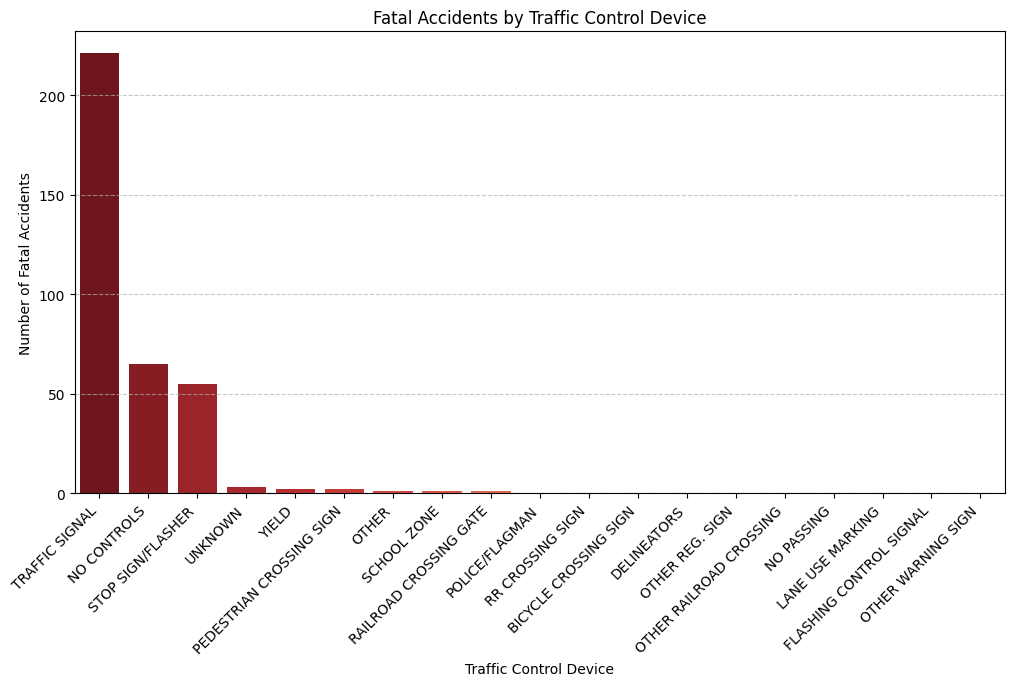

In [ ]:
# Reload the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Check for relevant columns
if "traffic_control_device" in df.columns and "most_severe_injury" in df.columns:
    # Analyze accident severity by traffic control device
    severity_by_control = df.groupby("traffic_control_device")["most_severe_injury"].value_counts().unstack().fillna(0)

    # Sort by the number of fatal accidents
    severity_by_control = severity_by_control.sort_values(by="FATAL", ascending=False)

    # Plot fatal accidents by traffic control device
    plt.figure(figsize=(12, 6))
    sns.barplot(x=severity_by_control.index, y=severity_by_control["FATAL"], palette="Reds_r")
    plt.ylabel("Number of Fatal Accidents")
    plt.xlabel("Traffic Control Device")
    plt.title("Fatal Accidents by Traffic Control Device")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
else:
    print("Required columns not found in the dataset.")


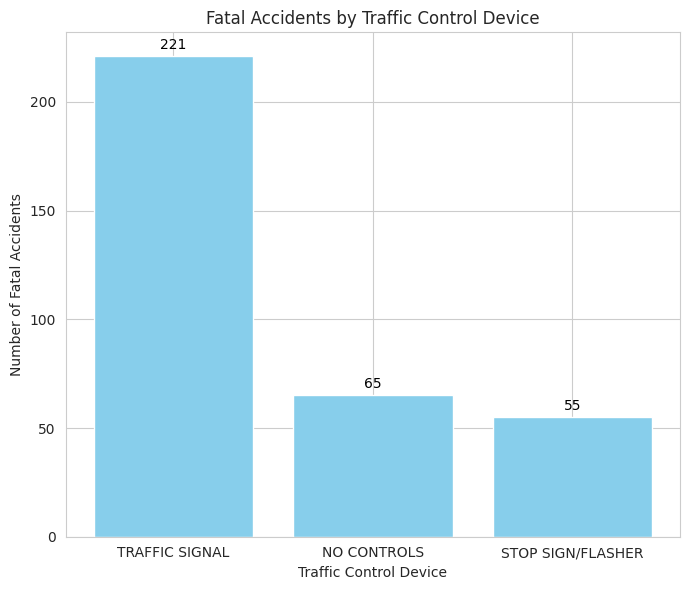

In [ ]:
# prompt: plot on most fatal accident by traffic control device make the graph colourful and ignore below 25 you could add exact value on the top of the bar correspondingly

import matplotlib.pyplot as plt

# Assuming 'severity_by_control' DataFrame is already created as in the previous code

# Filter out traffic control devices with less than 25 fatal accidents
filtered_severity = severity_by_control[severity_by_control["FATAL"] >= 25]

plt.figure(figsize=(7, 6))
bars = plt.bar(filtered_severity.index, filtered_severity["FATAL"], color='skyblue')
plt.xlabel("Traffic Control Device")
plt.ylabel("Number of Fatal Accidents")
plt.title("Fatal Accidents by Traffic Control Device")
plt.xticks(rotation=360)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


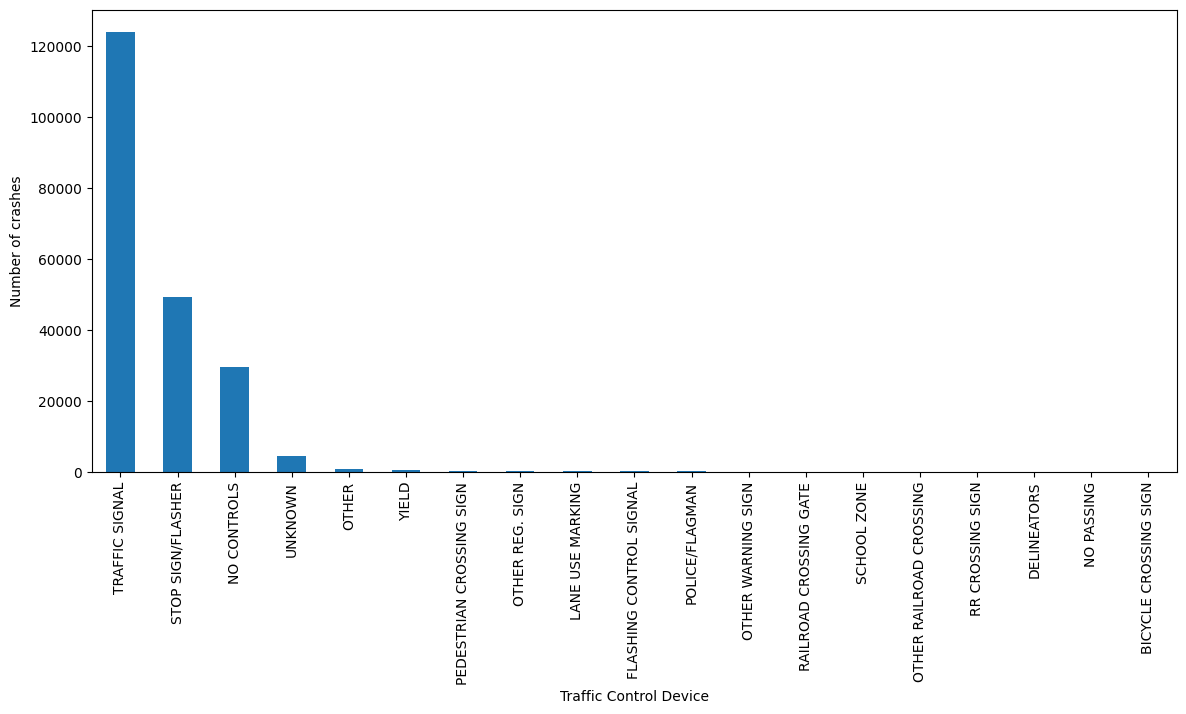

In [ ]:

df['traffic_control_device'].value_counts().plot(kind='bar', figsize=(14,6))
plt.ylabel('Number of crashes')
plt.xlabel('Traffic Control Device')
plt.show()

In [ ]:
df['roadway_surface_cond'].value_counts()

,count
roadway_surface_cond,
DRY,155905
WET,32908
UNKNOWN,12509
SNOW OR SLUSH,6203
ICE,1303
OTHER,438
"SAND, MUD, DIRT",40


<ipython-input-63-f71a5a393b1c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=road_condition_counts.index, y=road_condition_counts.values, palette="Blues_r")


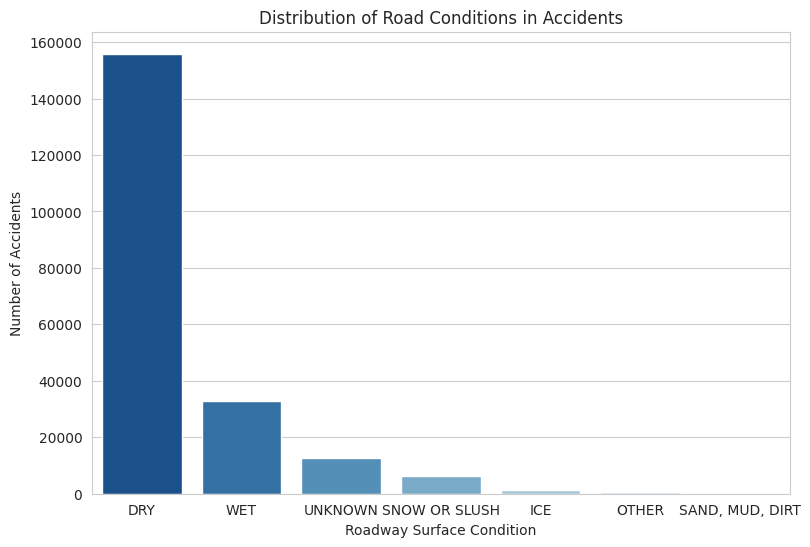

In [ ]:
# Distribution of road conditions in the dataset
plt.figure(figsize=(9, 6))
road_condition_counts = df["roadway_surface_cond"].value_counts()
sns.barplot(x=road_condition_counts.index, y=road_condition_counts.values, palette="Blues_r")
plt.xlabel("Roadway Surface Condition")
plt.ylabel("Number of Accidents")
plt.title("Distribution of Road Conditions in Accidents")
plt.xticks(rotation=360)
plt.show()



time_category
Afternoon      94.0
Evening       136.0
Late Night    106.0
Morning        53.0
Name: injuries_fatal, dtype: float64


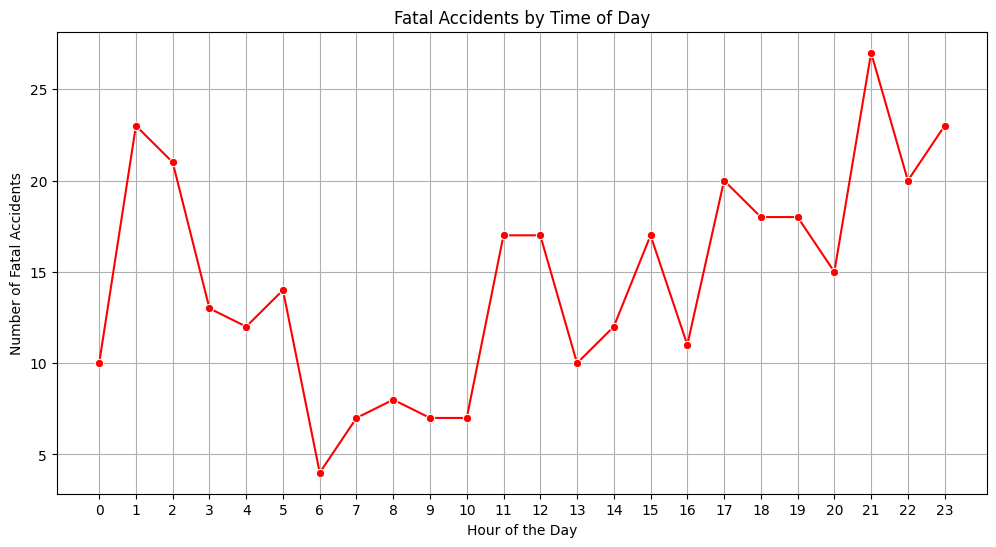

In [ ]:
# prompt: i want to know when fatal injuries happen at what time period

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and you've already converted 'crash_date' to datetime.
# and 'time_category' is defined as in the previous code

# Filter for fatal injuries
fatal_accidents = df[df['injuries_fatal'] > 0]

# Group by time category and count fatal accidents
fatal_accidents_by_time = fatal_accidents.groupby('time_category')['injuries_fatal'].sum()

# Print or plot the results
print(fatal_accidents_by_time)

# Analyze fatal injuries based on time of day
plt.figure(figsize=(12, 6))
fatal_accidents_by_hour = df[df["most_severe_injury"] == "FATAL"]["crash_hour"].value_counts().sort_index()

# Plot fatal injuries by time of day
sns.lineplot(x=fatal_accidents_by_hour.index, y=fatal_accidents_by_hour.values, marker="o", color="red")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Fatal Accidents")
plt.title("Fatal Accidents by Time of Day")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()



In [ ]:
df['lighting_condition'].value_counts()

,count
lighting_condition,
DAYLIGHT,134109
"DARKNESS, LIGHTED ROAD",53378
DARKNESS,7436
DUSK,6323
UNKNOWN,4336
DAWN,3724


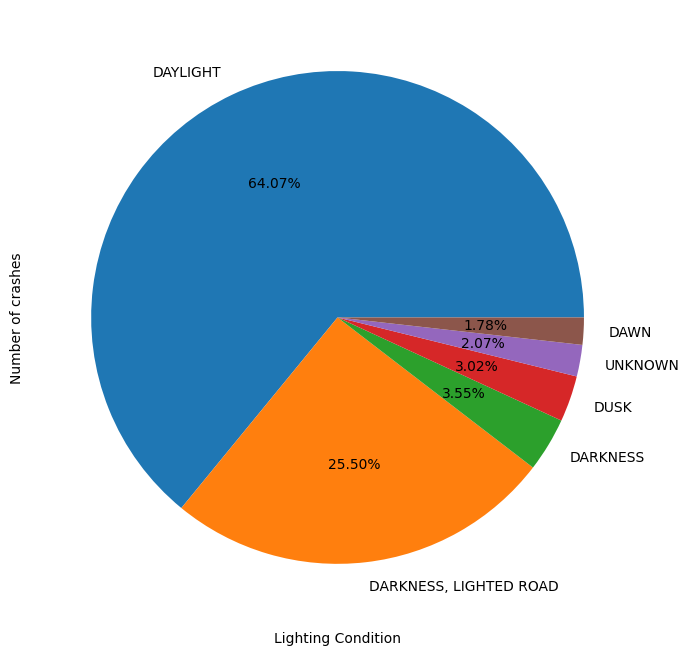

In [ ]:
df['lighting_condition'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.02f%%')
plt.ylabel('Number of crashes')
plt.xlabel('Lighting Condition')
plt.show()

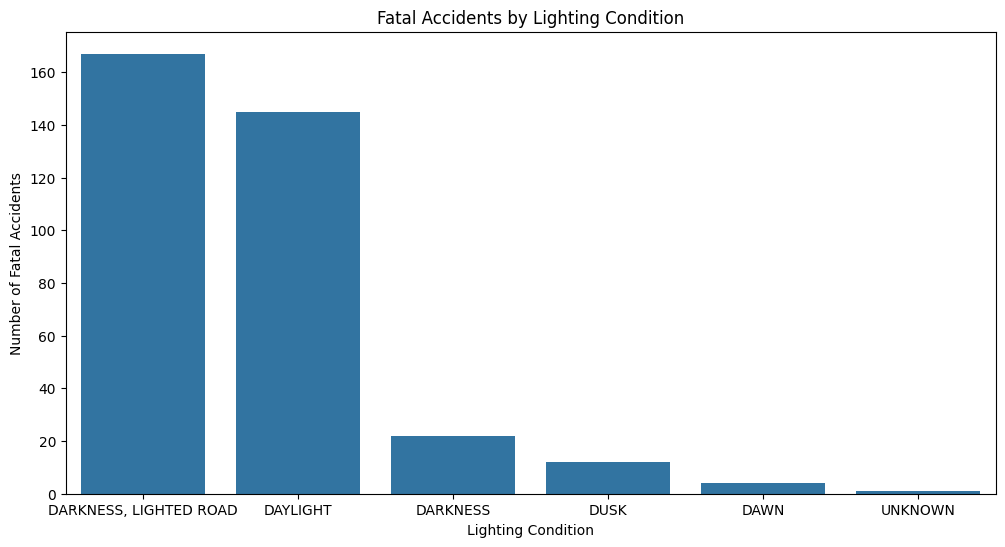

In [ ]:
# prompt: i want to know at what lighting condition fatal accidents happen more

import matplotlib.pyplot as plt
# Analyze fatal accidents based on lighting conditions
fatal_accidents_by_lighting = df[df['most_severe_injury'] == 'FATAL']['lighting_condition'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=fatal_accidents_by_lighting.index, y=fatal_accidents_by_lighting.values)
plt.xlabel("Lighting Condition")
plt.ylabel("Number of Fatal Accidents")
plt.title("Fatal Accidents by Lighting Condition")
plt.xticks(rotation=360)
plt.show()


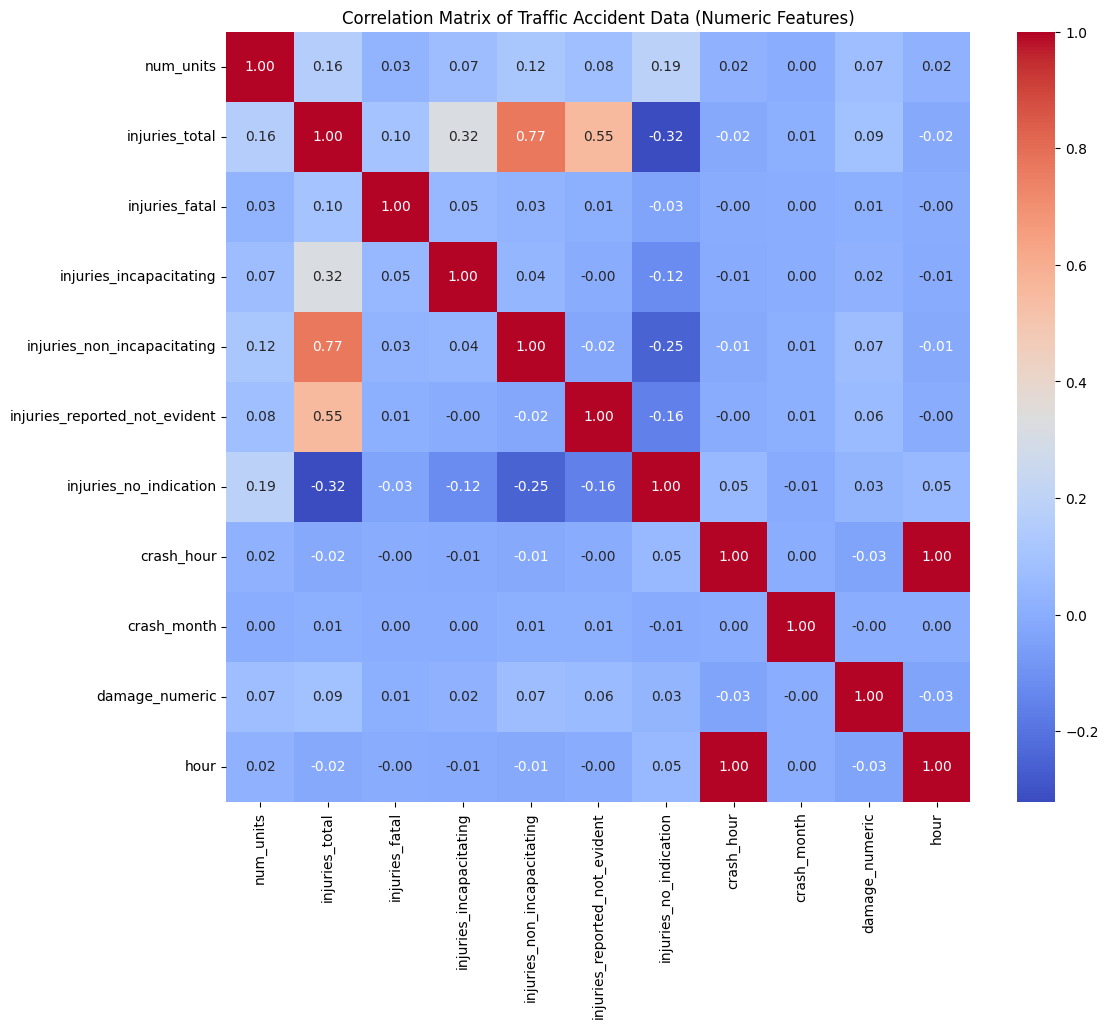

In [ ]:


# Correlation analysis for numeric features only
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Now calculate the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Traffic Accident Data (Numeric Features)')
plt.show()

<ipython-input-33-7ee0afe21f6b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["crash_month"], palette="viridis")


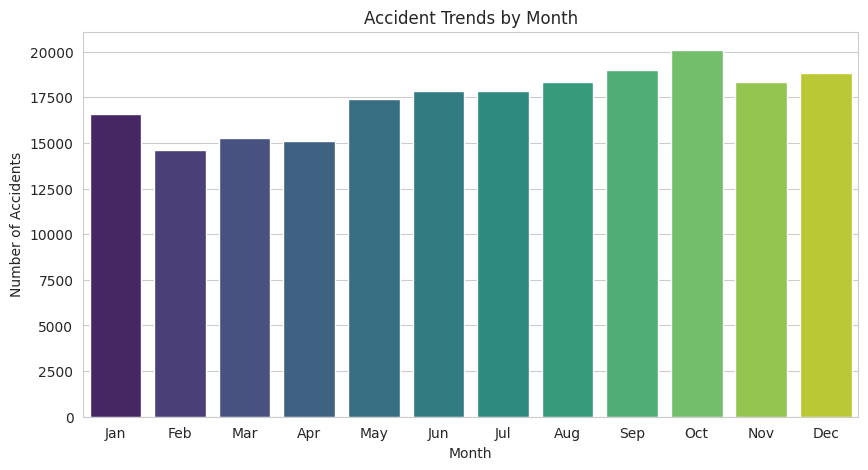

<ipython-input-33-7ee0afe21f6b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["crash_hour"], palette="magma")


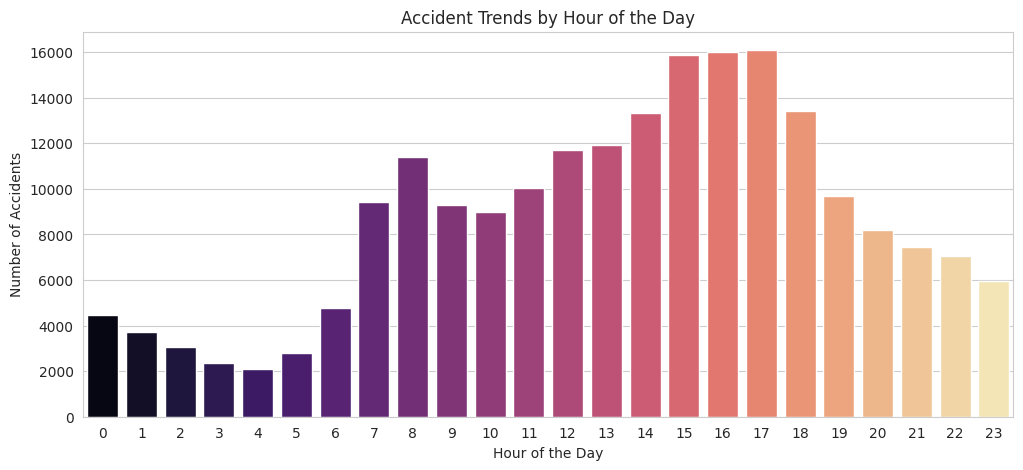

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set_style("whitegrid")

# Accident trends by month
plt.figure(figsize=(10, 5))
sns.countplot(x=df["crash_month"], palette="viridis")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.title("Accident Trends by Month")
plt.xticks(range(0, 12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

# Accident trends by hour
plt.figure(figsize=(12, 5))
sns.countplot(x=df["crash_hour"], palette="magma")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.title("Accident Trends by Hour of the Day")
plt.xticks(range(0, 24))
plt.show()


The hours with the most accidents are between 4:00 PM and 5:00 PM, which is when people are returning home from work.




cause_category
Traffic Rules Violation    41467
Bad Road Conditions         2637
Obstacle                    2077
Animal                        49
Name: count, dtype: int64


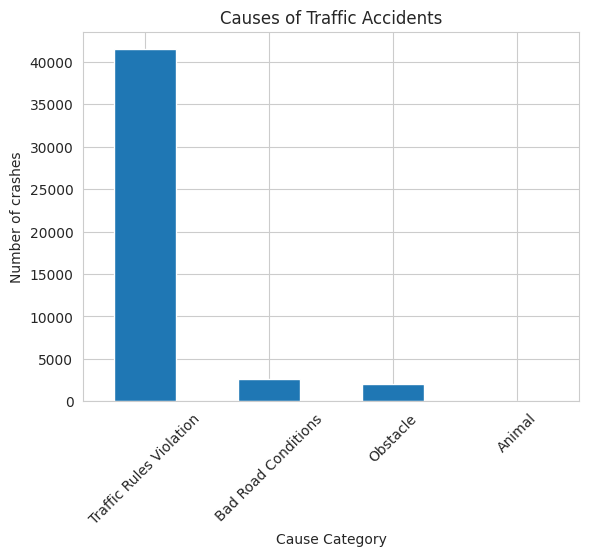

In [ ]:
def categorize_cause(cause):
    cause = str(cause).lower()
    if 'traffic' in cause or 'violation' in cause or 'signal' in cause or 'speed' in cause or 'right of way' in cause or 'red light' in cause or 'phone' in cause or 'chat' in cause or 'drinking' in cause or 'rash' in cause or 'wrong way' in cause:
        return 'Traffic Rules Violation'
    elif 'obstacle' in cause or 'object' in cause or 'debris' in cause or 'trees' in cause or 'board' in cause or 'NONMOTORIST' in cause or 'people' in cause or 'vision obscured' in cause:
        return 'Obstacle'
    elif 'animal' in cause:
        return 'Animal'
    elif 'road' in cause or 'surface' in cause or 'condition' in cause or 'shoulder' in cause or 'water' in cause or 'ice' in cause or 'snow' in cause or 'signal board' in cause or 'bad navigation' in cause or 'sign board' in cause:
        return 'Bad Road Conditions'
    elif 'rain' in cause or 'snow' in cause or 'wind' in cause or 'dry' in cause or 'ice' in cause:
        return 'Weather Conditions'




df['cause_category'] = df['prim_contributory_cause'].apply(categorize_cause)

print(df['cause_category'].value_counts())
df['cause_category'].value_counts().plot(kind='bar')
plt.title('Causes of Traffic Accidents')
plt.ylabel('Number of crashes')
plt.xlabel('Cause Category')
plt.xticks(rotation = 45)
plt.show()



In [ ]:
# prompt: average accident occurrence in a day, week, and month

# Calculate the average number of accidents per day
average_daily_accidents = df.groupby(df['crash_date'].dt.date)['crash_date'].count().mean()

# Calculate the average number of accidents per week
average_weekly_accidents = df.groupby(df['crash_date'].dt.isocalendar().week)['crash_date'].count().mean()

# Calculate the average number of accidents per month
average_monthly_accidents = df.groupby(df['crash_date'].dt.month)['crash_date'].count().mean()

print(f"Average daily accidents: {average_daily_accidents:.2f}")
print(f"Average weekly accidents: {average_weekly_accidents:.2f}")
print(f"Average monthly accidents: {average_monthly_accidents:.2f}")


Average daily accidents: 60.55
Average weekly accidents: 3949.17
Average monthly accidents: 17442.17


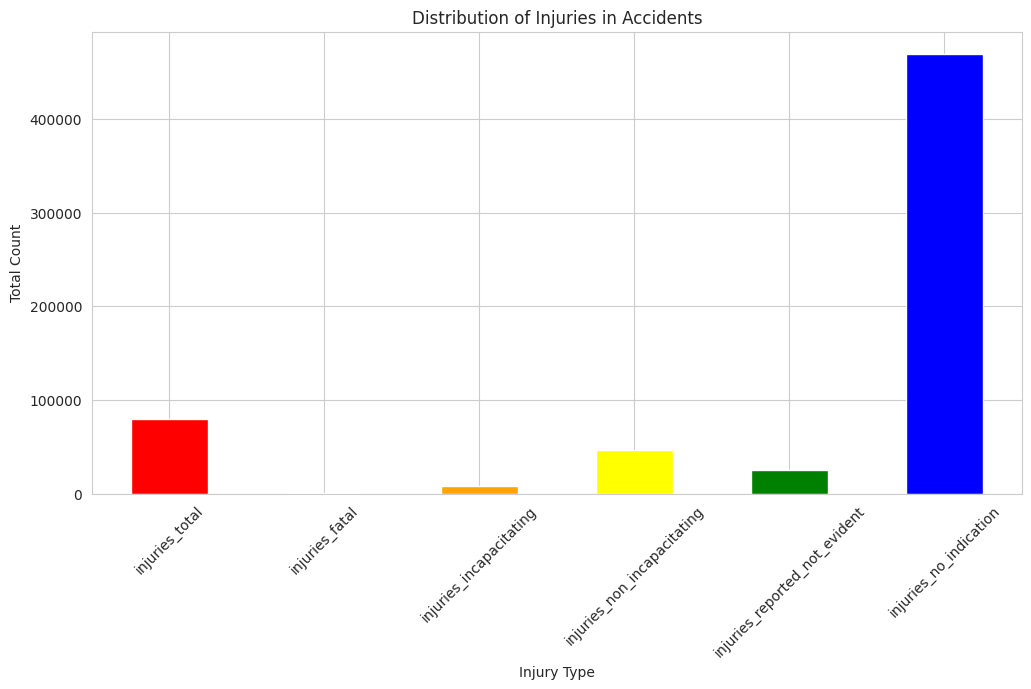

In [ ]:
injury_cols = [
    "injuries_total", "injuries_fatal", "injuries_incapacitating",
    "injuries_non_incapacitating", "injuries_reported_not_evident", "injuries_no_indication"
]

plt.figure(figsize=(12, 6))
df[injury_cols].sum().plot(kind="bar", color=["red", "darkred", "orange", "yellow", "green", "blue"])
plt.xlabel("Injury Type")
plt.ylabel("Total Count")
plt.title("Distribution of Injuries in Accidents")
plt.xticks(rotation=45)
plt.show()

<Figure size 400x400 with 0 Axes>

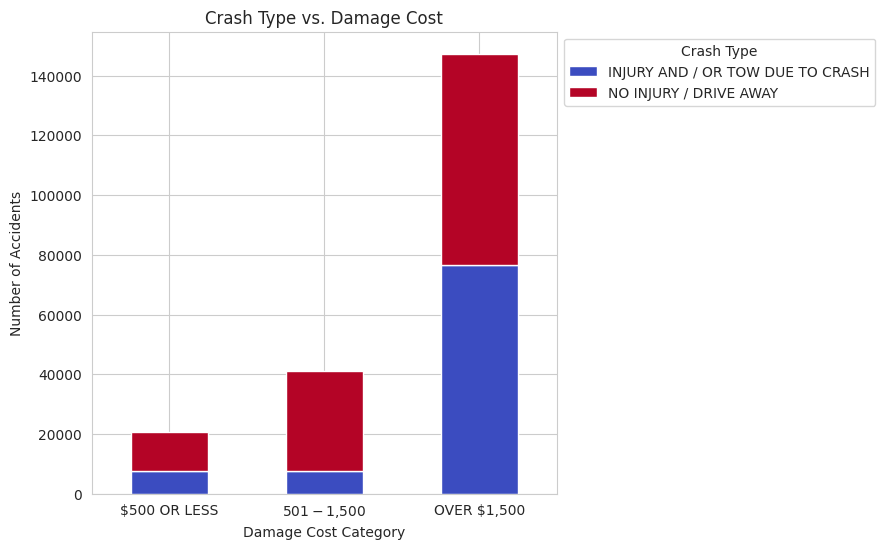

In [ ]:
# Damage distribution by crash type
plt.figure(figsize=(4,4))
damage_by_crash = df.groupby("damage")["crash_type"].value_counts().unstack().fillna(0)
damage_by_crash.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(6, 6))
plt.xlabel("Damage Cost Category")
plt.ylabel("Number of Accidents")
plt.title("Crash Type vs. Damage Cost")
plt.xticks(rotation=360)
plt.legend(title="Crash Type", bbox_to_anchor=(1, 1))
plt.show()


<ipython-input-47-d4802c42ca74>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cause_counts.index, y=cause_counts.values, palette="coolwarm")


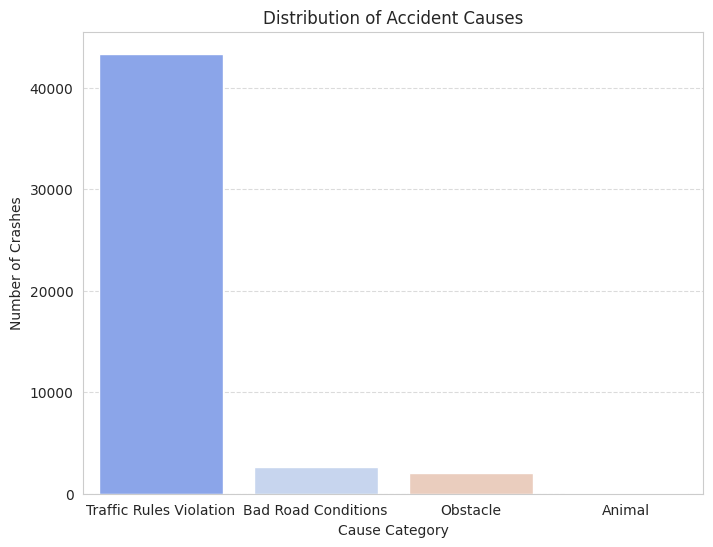

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to categorize accident causes
def categorize_cause(cause):
    if pd.isna(cause):
        return "Unknown"

    cause = str(cause).lower()

    # Traffic Violations
    traffic_keywords = ['traffic', 'violation', 'signal', 'speed', 'right of way', 'red light',
                        'phone', 'chat', 'drinking', 'reckless', 'wrong way', 'distracted']
    if any(word in cause for word in traffic_keywords):
        return 'Traffic Rules Violation'

    # Obstacles (Nonmotorists, Debris, Vision Issues)
    obstacle_keywords = ['obstacle', 'object', 'debris', 'tree', 'board', 'nonmotorist', 'pedestrian',
                         'people', 'vision obscured', 'bicycle', 'parked vehicle']
    if any(word in cause for word in obstacle_keywords):
        return 'Obstacle'

    # Animal-Related Crashes
    if 'animal' in cause:
        return 'Animal'

    # Bad Road Conditions
    road_keywords = ['road', 'surface', 'condition', 'shoulder', 'pothole', 'construction', 'ice', 'snow', 'water', 'navigation', 'signs', 'signal boards']
    if any(word in cause for word in road_keywords):
        return 'Bad Road Conditions'

    # Weather Conditions
    weather_keywords = ['rain', 'snow', 'wind', 'dry', 'ice', 'fog', 'storm']
    if any(word in cause for word in weather_keywords):
        return 'Weather Conditions'



# Apply categorization
df['cause_category'] = df['prim_contributory_cause'].apply(categorize_cause)

# Count and sort cause categories
cause_counts = df['cause_category'].value_counts()

# Plot the data using Seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=cause_counts.index, y=cause_counts.values, palette="coolwarm")
plt.ylabel('Number of Crashes')
plt.xlabel('Cause Category')
plt.xticks(rotation= 360)
plt.title('Distribution of Accident Causes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
